In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers_df = pd.read_csv('customers2afd6ea.csv')
reason_df = pd.read_csv('reason18315ff.csv')
sentiment_df = pd.read_csv('sentiment_statisticscc1e57a.csv')
calls_df = pd.read_csv('callsf0d4f5a.csv') 
test_df = pd.read_csv('testbc7185d.csv')

In [3]:
customers_df.head()
customers_df.info()

reason_df.head()
reason_df.info()

sentiment_df.head()
sentiment_df.info()

calls_df.head()
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71810 entries, 0 to 71809
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       71810 non-null  int64  
 1   customer_name     71810 non-null  object 
 2   elite_level_code  46043 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66653 entries, 0 to 66652
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   call_id              66653 non-null  int64 
 1   primary_call_reason  66653 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71810 entries, 0 to 71809
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   call_id             

In [4]:
customers_df.isnull().sum()
reason_df.isnull().sum()
sentiment_df.isnull().sum()
calls_df.isnull().sum()

call_id                    0
customer_id                0
agent_id                   0
call_start_datetime        0
agent_assigned_datetime    0
call_end_datetime          0
call_transcript            0
dtype: int64

In [5]:
# Example of merging reason and sentiment on call_id
data_df = reason_df.merge(sentiment_df, on='call_id', how='inner')
data_df = data_df.merge(calls_df, on='call_id', how='inner')

In [6]:
calls_df['call_start_datetime'] = pd.to_datetime(calls_df['call_start_datetime'])
calls_df['agent_assigned_datetime'] = pd.to_datetime(calls_df['agent_assigned_datetime'])
calls_df['call_end_datetime'] = pd.to_datetime(calls_df['call_end_datetime'])

In [7]:
calls_df['AHT'] = (calls_df['call_end_datetime'] - calls_df['agent_assigned_datetime']).dt.total_seconds()
calls_df['AST'] = (calls_df['agent_assigned_datetime'] - calls_df['call_start_datetime']).dt.total_seconds()
print(calls_df['AHT'])
print(calls_df['AST'])

0        1860.0
1         720.0
2        1140.0
3         420.0
4         540.0
          ...  
71805    1680.0
71806     480.0
71807     360.0
71808     240.0
71809     180.0
Name: AHT, Length: 71810, dtype: float64
0        420.0
1        180.0
2        480.0
3        300.0
4        600.0
         ...  
71805    540.0
71806    180.0
71807    360.0
71808    360.0
71809    600.0
Name: AST, Length: 71810, dtype: float64


In [8]:
call_reason_counts = reason_df['primary_call_reason'].value_counts()
print(call_reason_counts)

primary_call_reason
IRROPS                     13057
Voluntary Change           10291
Seating                     6223
Mileage Plus                5487
Post-Flight                 3869
Communications              3779
Products and Services       2792
Upgrade                     2682
Baggage                     2616
Booking                     2589
Checkout                    1840
Check-In                    1490
Voluntary Cancel            1304
Digital Support              996
ETC                          930
Traveler Updates             772
Schedule Change              707
Other Topics                 568
Products & Services          476
Disability                   394
Check In                     385
Post Flight                  373
Voluntary  Cancel            278
IRROPS                       254
Other  Topics                234
Voluntary Change             208
Voluntary   Change           200
Voluntary  Change            149
Seating                      142
Digital   Support      

In [9]:
print(calls_df.columns)

Index(['call_id', 'customer_id', 'agent_id', 'call_start_datetime',
       'agent_assigned_datetime', 'call_end_datetime', 'call_transcript',
       'AHT', 'AST'],
      dtype='object')


In [10]:
calls_df = calls_df.merge(reason_df, on='call_id', how='inner')

In [11]:
avg_aht_ast = calls_df.groupby('primary_call_reason')[['AHT', 'AST']].mean().sort_values(by='AHT', ascending=False)
print(avg_aht_ast)

                                 AHT         AST
primary_call_reason                             
ETC                      1600.909091  518.181818
Checkout                 1342.500000  712.500000
Mileage  Plus            1019.555556  351.555556
Checkout                 1008.358696  725.021739
Mileage Plus              995.724440  361.224713
Mileage Plus              994.800000  354.600000
Post Flight               976.729223  570.241287
Mileage   Plus            964.651163  366.976744
ETC                       947.806452  544.903226
Post-Flight               944.318182  572.045455
Post-Flight               928.410442  569.294391
Schedule Change           835.000000  240.000000
Communications            826.853665  239.920614
Communications            818.360656  242.950820
IRROPS                    785.491307  360.174619
IRROPS                    765.826772  355.275591
Voluntary Cancel          756.000000  518.400000
Products and Services     752.815186  303.008596
Voluntary Cancel    

In [12]:
avg_sentiment = data_df.groupby('primary_call_reason')['average_sentiment'].mean().sort_values()
print(avg_sentiment)

primary_call_reason
Check-In                  -0.082069
Checkout                  -0.075000
IRROPS                    -0.074181
Schedule Change           -0.071667
Voluntary Cancel          -0.070000
Checkout                  -0.068874
Post-Flight               -0.068750
IRROPS                    -0.068063
Products and Services     -0.065469
Post Flight               -0.065108
Post-Flight               -0.063689
ETC                       -0.057273
ETC                       -0.049139
Check-In                  -0.045723
Digital Support           -0.044864
Other Topics              -0.036875
Communications            -0.036694
Digital   Support         -0.036250
Products & Services       -0.034055
Products and Services     -0.033782
Voluntary Cancel          -0.033183
Schedule Change           -0.032560
Mileage  Plus             -0.032074
Baggage                   -0.031538
Digital  Support          -0.030267
Unaccompanied Minor       -0.030000
Check In                  -0.029506
Traveler

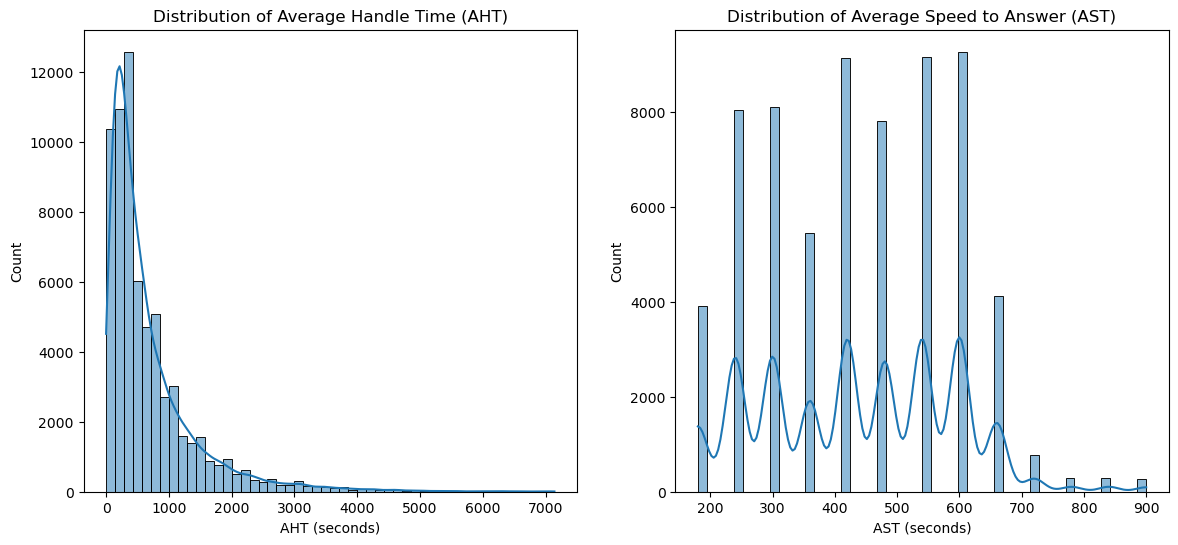

In [13]:
# Histogram for AHT and AST
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(calls_df['AHT'], bins=50, kde=True)
plt.title('Distribution of Average Handle Time (AHT)')
plt.xlabel('AHT (seconds)')

plt.subplot(1, 2, 2)
sns.histplot(calls_df['AST'], bins=50, kde=True)
plt.title('Distribution of Average Speed to Answer (AST)')
plt.xlabel('AST (seconds)')
plt.show()

                                 AHT         AST
primary_call_reason                             
ETC                      1600.909091  518.181818
Checkout                 1342.500000  712.500000
Mileage  Plus            1019.555556  351.555556
Checkout                 1008.358696  725.021739
Mileage Plus              995.724440  361.224713
Mileage Plus              994.800000  354.600000
Post Flight               976.729223  570.241287
Mileage   Plus            964.651163  366.976744
ETC                       947.806452  544.903226
Post-Flight               944.318182  572.045455
Post-Flight               928.410442  569.294391
Schedule Change           835.000000  240.000000
Communications            826.853665  239.920614
Communications            818.360656  242.950820
IRROPS                    785.491307  360.174619
IRROPS                    765.826772  355.275591
Voluntary Cancel          756.000000  518.400000
Products and Services     752.815186  303.008596
Voluntary Cancel    

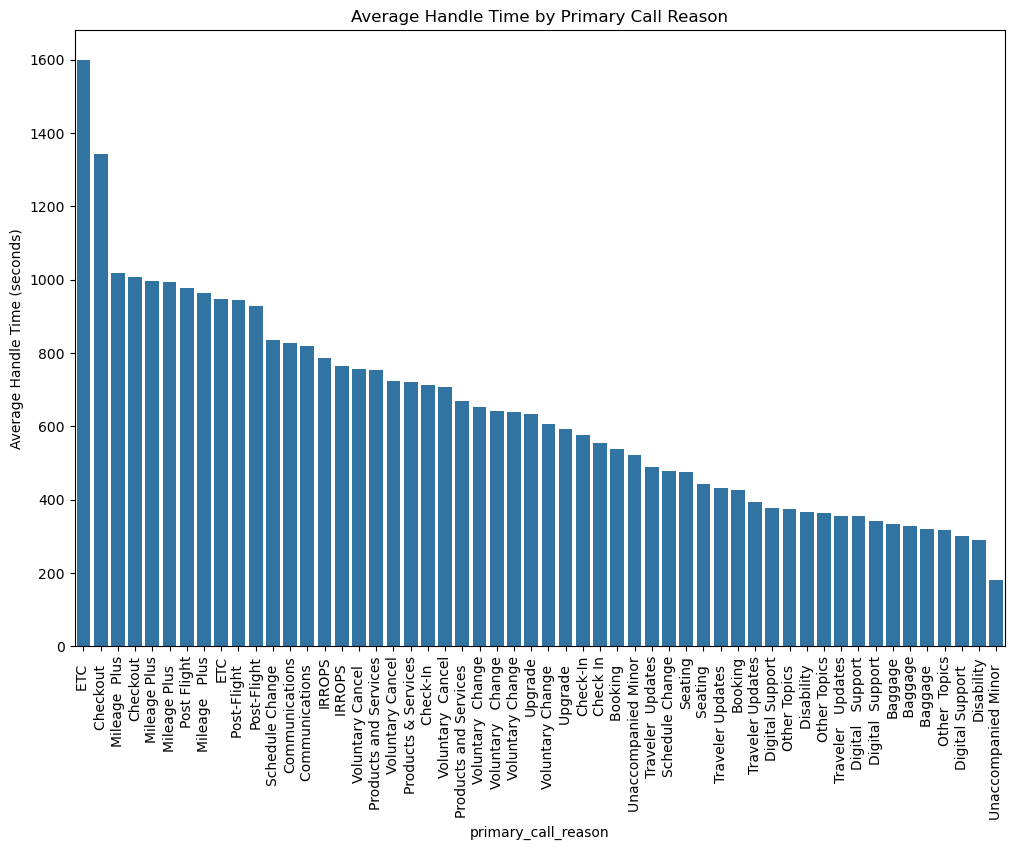

In [14]:
# Average AHT and AST by Call Reason
avg_aht_ast = calls_df.groupby('primary_call_reason')[['AHT', 'AST']].mean().sort_values(by='AHT', ascending=False)
print(avg_aht_ast)
plt.figure(figsize=(12, 8))
sns.barplot(x=avg_aht_ast.index, y=avg_aht_ast['AHT'])
plt.xticks(rotation=90)
plt.title("Average Handle Time by Primary Call Reason")
plt.ylabel('Average Handle Time (seconds)')
plt.show()

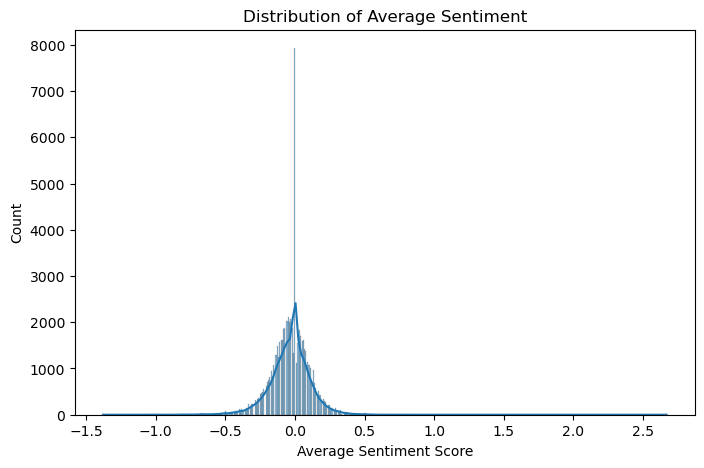

In [15]:
plt.figure(figsize=(8, 5))
sns.histplot(data_df['average_sentiment'], kde=True)
plt.title('Distribution of Average Sentiment')
plt.xlabel('Average Sentiment Score')
plt.show()

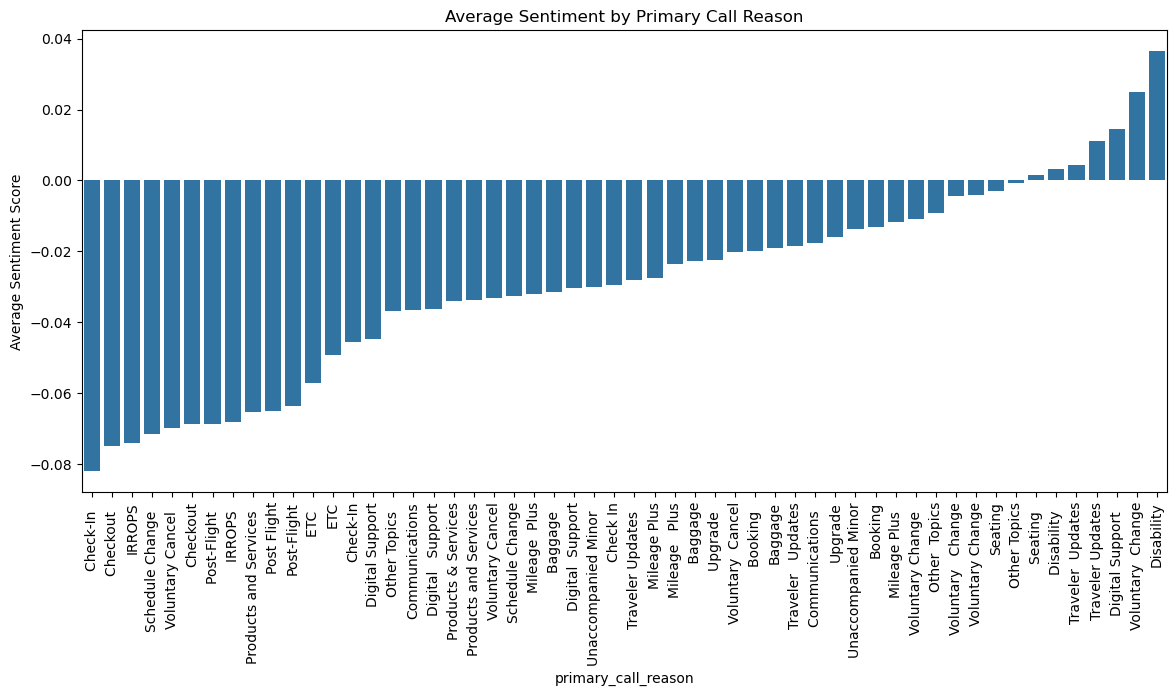

In [16]:
avg_sentiment_reason = data_df.groupby('primary_call_reason')['average_sentiment'].mean().sort_values()
plt.figure(figsize=(14, 6))
sns.barplot(x=avg_sentiment_reason.index, y=avg_sentiment_reason)
plt.xticks(rotation=90)
plt.title('Average Sentiment by Primary Call Reason')
plt.ylabel('Average Sentiment Score')
plt.show()

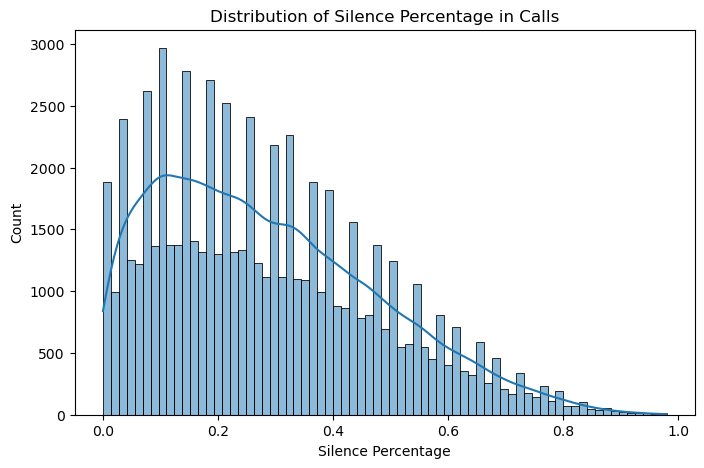

In [17]:
plt.figure(figsize=(8, 5))
sns.histplot(data_df['silence_percent_average'], kde=True)
plt.title('Distribution of Silence Percentage in Calls')
plt.xlabel('Silence Percentage')
plt.show()

In [18]:
data_df = data_df.merge(calls_df[['call_id', 'AHT', 'AST']], on='call_id', how='inner')

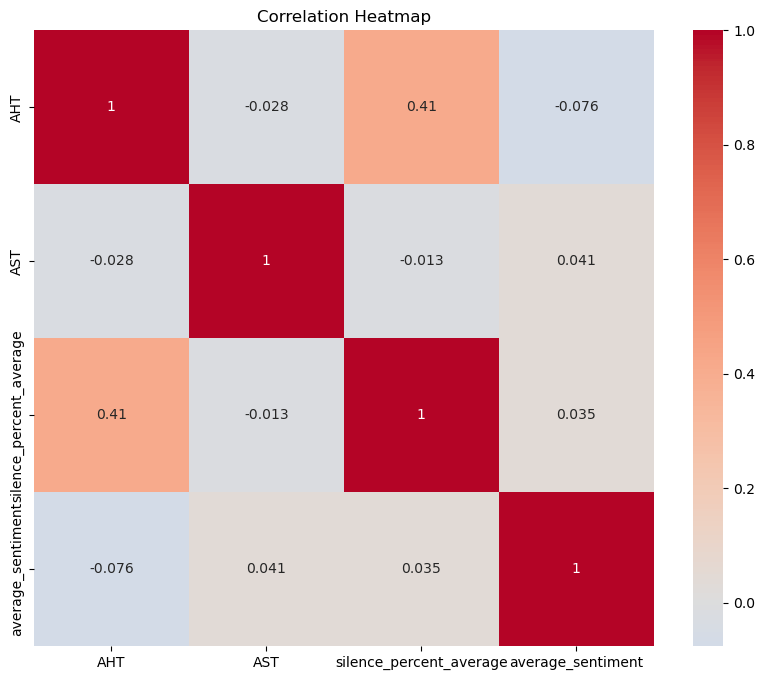

In [19]:
correlation = data_df[['AHT', 'AST', 'silence_percent_average', 'average_sentiment']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

primary_call_reason
IRROPS                     13057
Voluntary Change           10291
Seating                     6223
Mileage Plus                5487
Post-Flight                 3869
Communications              3779
Products and Services       2792
Upgrade                     2682
Baggage                     2616
Booking                     2589
Checkout                    1840
Check-In                    1490
Voluntary Cancel            1304
Digital Support              996
ETC                          930
Traveler Updates             772
Schedule Change              707
Other Topics                 568
Products & Services          476
Disability                   394
Check In                     385
Post Flight                  373
Voluntary  Cancel            278
IRROPS                       254
Other  Topics                234
Voluntary Change             208
Voluntary   Change           200
Voluntary  Change            149
Seating                      142
Digital   Support      

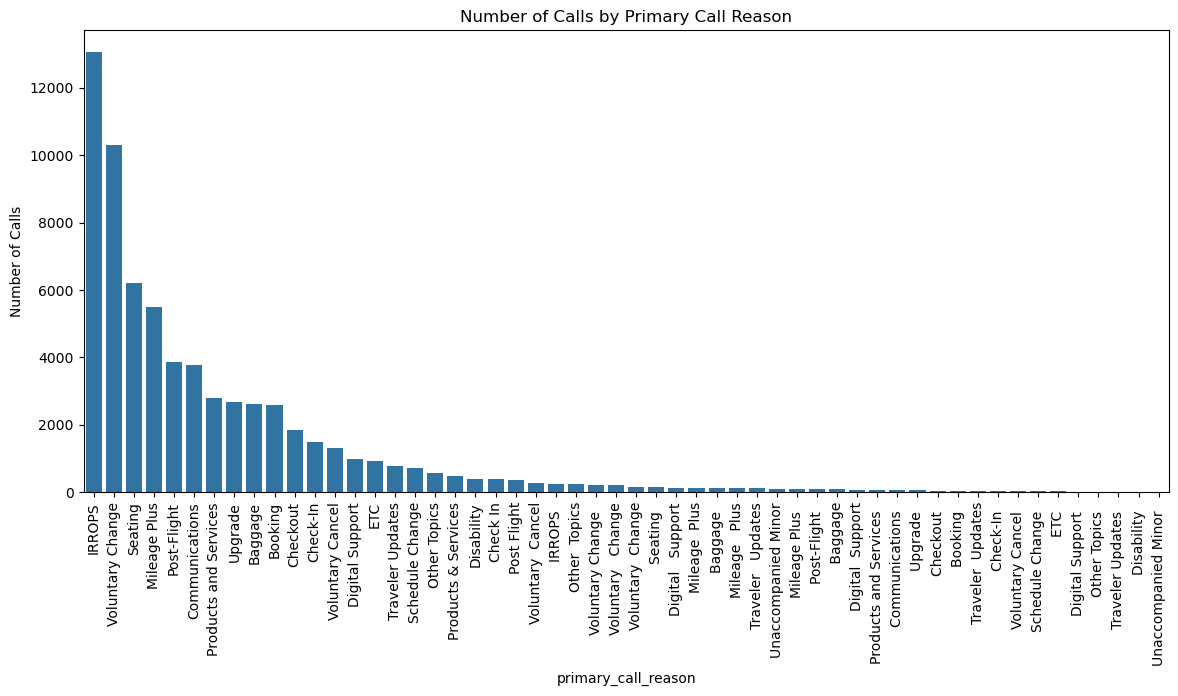

In [44]:
call_reason_counts = reason_df['primary_call_reason'].value_counts()
print(call_reason_counts)
plt.figure(figsize=(14, 6))
sns.barplot(x=call_reason_counts.index, y=call_reason_counts.values)
plt.xticks(rotation=90)
plt.title('Number of Calls by Primary Call Reason')
plt.ylabel('Number of Calls')
plt.show()

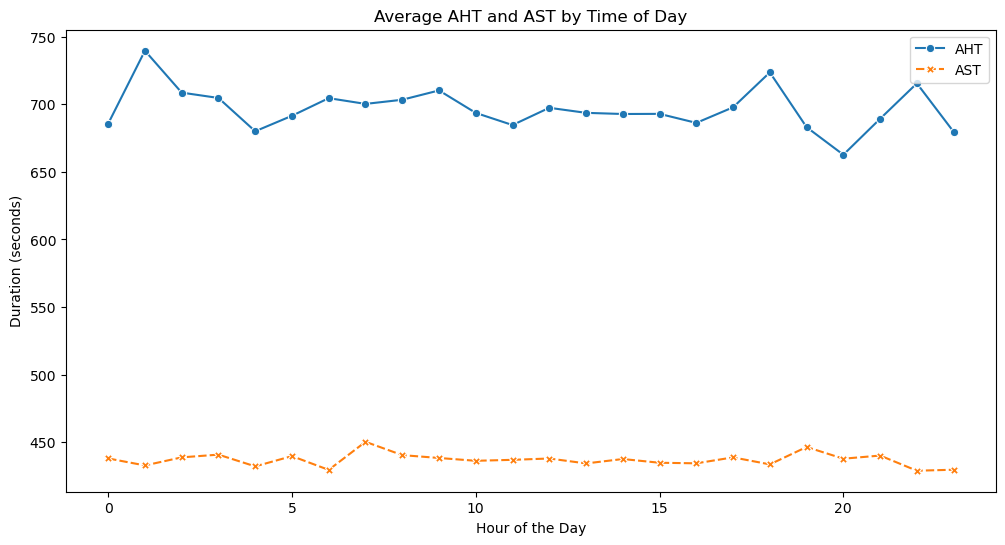

In [21]:
# Extracting hour from call_start_datetime for time of day analysis
calls_df['hour'] = calls_df['call_start_datetime'].dt.hour
avg_duration_hour = calls_df.groupby('hour')[['AHT', 'AST']].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_duration_hour, markers=True)
plt.title('Average AHT and AST by Time of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Duration (seconds)')
plt.show()